In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import codecs
import gc
import json
% matplotlib inline 
DATA_DIR = 'data'

CHUNKSIZE = 10000000
MAX_ROW_NUM = 50000000
# MAX_ROW_NUM = 3000000

NYC_RANGE = (-74.3400, -73.6700, 40.4500, 40.9500)
NYC_RANGE_EXTENDED = (-74.4667, -73.0083, 40.4203, 41.3077)
NYC_RANGE_FILENAME = 'gnyc.png'
nyc_map = plt.imread(os.path.join(DATA_DIR, NYC_RANGE_FILENAME))

NYC_EXTENDED_FILENAME = 'gnyce.png'
nyc_map_extended = plt.imread(os.path.join(DATA_DIR, NYC_EXTENDED_FILENAME))

WASHED_DATA_DIR = 'washed'
WASHED_FILE_NAME = 'train_wfd.csv'

INPUT_FILE_PATH = os.path.join(WASHED_DATA_DIR, WASHED_FILE_NAME)

COLUMN_NAMES = ['fare_amount', 'pickup_longitude', 'pickup_latitude', 
                'dropoff_longitude', 'dropoff_latitude', 'passenger_count']


In [2]:
df = pd.read_csv(INPUT_FILE_PATH, nrows=CHUNKSIZE)

In [4]:
jfk_df = df[(df.fare_amount >= 52) & (df.fare_amount <= 56.5)]

In [5]:
#Plot lon & lat
def plot_lon_lat(lon, lat, geomap=None, box=None, s=1):
    plt.figure(figsize=(14, 14))
    plt.scatter(lon, lat, s=s, c='b')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    if geomap is not None:
        plt.xlim(box[0], box[1])
        plt.ylim(box[2], box[3])
        plt.imshow(geomap, zorder=0, extent=box)
# plot_lon_lat(df.pickup_longitude, df.pickup_latitude, nyc_map_extended, NYC_RANGE_EXTENDED)
# plot_lon_lat(df.dropoff_longitude, df.dropoff_latitude, nyc_map_extended, NYC_RANGE_EXTENDED)

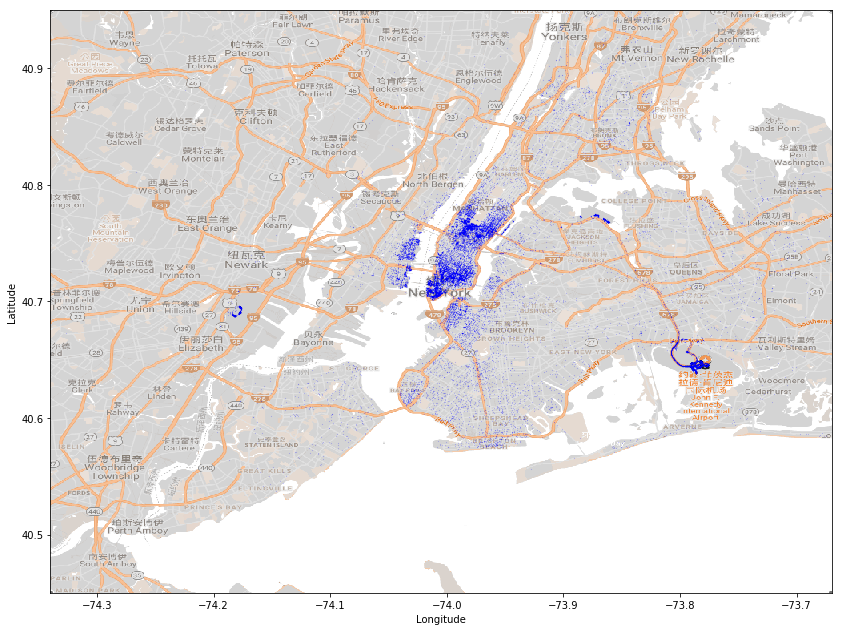

In [8]:
plot_lon_lat(jfk_df.dropoff_longitude, jfk_df.dropoff_latitude,
             nyc_map, NYC_RANGE, s=0.005)

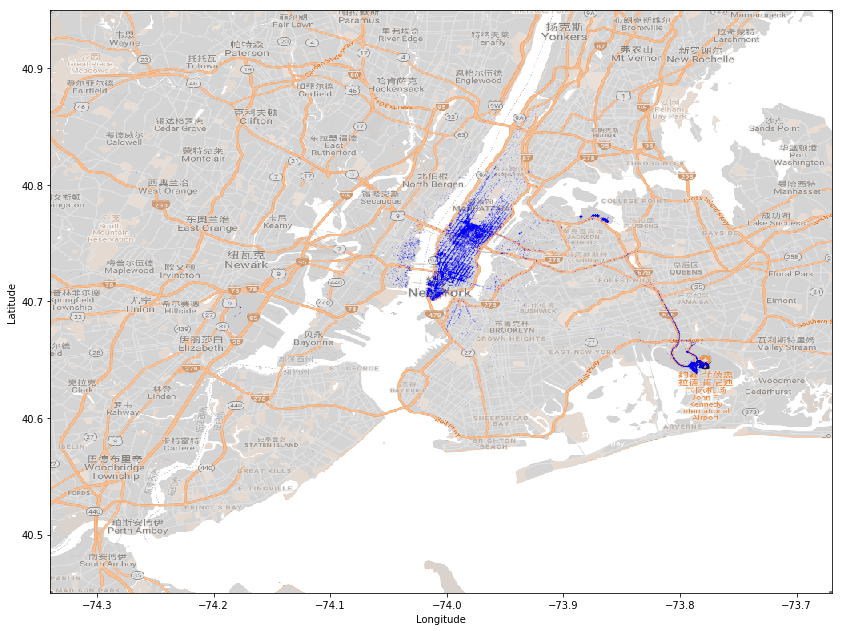

In [9]:
plot_lon_lat(jfk_df.pickup_longitude, jfk_df.pickup_latitude,
             nyc_map, NYC_RANGE, s=0.005)

In [ ]:
JFK_RANGE = (-73.8250, -73.7746, 40.6397, 40.7121)
def get_jfk_mask(d):
    return (d.pickup_longitude >= JFK_RANGE[0]) & (d.pickup_longitude <= JFK_RANGE[1]) & \
           (d.pickup_latitude >= JFK_RANGE[2]) & (d.pickup_latitude <= JFK_RANGE[3]) | \
           (d.dropoff_longitude >= JFK_RANGE[0]) & (d.dropoff_longitude <= JFK_RANGE[1]) & \
           (d.dropoff_latitude >= JFK_RANGE[2]) & (d.dropoff_latitude <= JFK_RANGE[3])
